### Intro

As far as accessing GenBank and constructing phylogenetic trees is almost the same as I am doing in the spring semester project, the goal of this project will be the phylogenetic study of distant species.
For example, I chose some species from vertebrates (*Homo sapiens*, *Mus musculus*, *Rattus norvegicus*, *Canis lupus familiaris*, *Pan troglodytes*, *Amazona aestiva*, *Mustela putorius furo*, *Callorhinus ursinus*, *Chlamydotis macqueenii*, *Columba livia*, *Eschrichtius robustus*, *Gallus gallus*).
Some of them are really distant, for example, human and chicken.

ENSEMBL database will be used for finding orthologous.
Accession to the ENSEMBL database will be done with REST API and python.
As marker genes were selected INSR and BRCA2 genes.


### Accessing ENSEMBL API

In [1]:
import requests, sys
from pprint import pprint


In [2]:
# Using GET family/member/id/:id API method
def ensembl_request(gene, species='homo_sapiens'):
    r = requests.get(f'http://rest.ensembl.org/family/member/symbol/{species}/{gene}', headers={ "Content-Type" : "application/json"})
     
    if not r.ok:
      r.raise_for_status()
      sys.exit()
        
    return r.json()

# marker genes
genes = ['INSR', 'BRCA2']
ress = [ensembl_request(gene) for gene in genes]


In [64]:
genomes = {'Homo sapiens', 'Mus musculus', 'Rattus norvegicus', 'Canis lupus familiaris', 'Pan troglodytes', 'Amazona aestiva', 'Mustela putorius furo', 'Callorhinus ursinus', 'Chlamydotis macqueenii', 'Columba livia', 'Eschrichtius robustus', 'Gallus gallus'}
alignments = {}

for gene, res in zip(genes, ress):
    for member in res['1']['members']:
        genome = member['genome']
        if genome in genomes:
            alignments[(genome, gene)] = member['protein_alignment']
            

### Costructing alignment

In [65]:
with open('data/alignment.fasta', 'w') as f:
    for genome in genomes:
        print('>' + genome, file=f)
        print(''.join(alignments[(genome, gene)] for gene in genes), file=f)
        

### MrBayes tree
Online version with default parameters

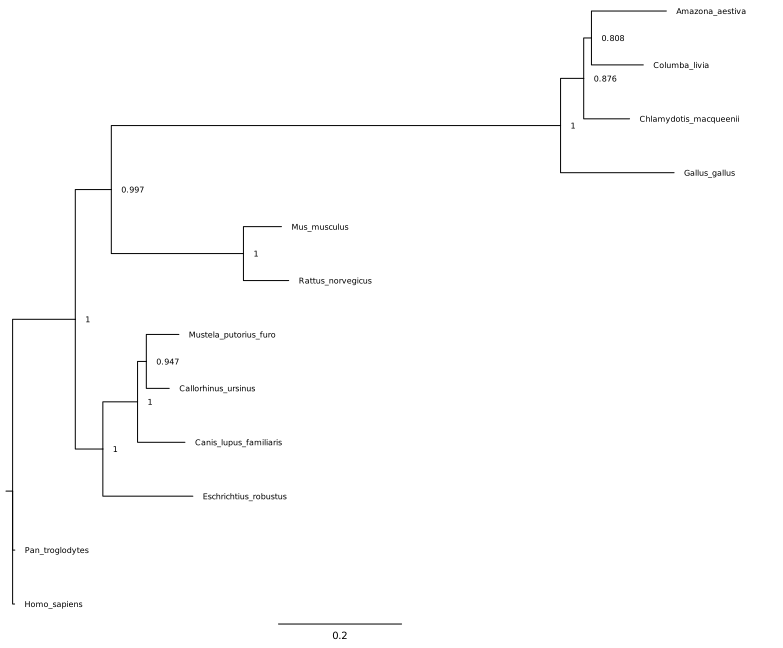

In [1]:
from IPython.core.display import SVG
SVG(filename='data/mr_bayes.tree.svg')

### RAxML tree
```raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m PROTCATBLOSUM62 -n raxml.tree -T 16 -s alignment.fasta -p 12345```

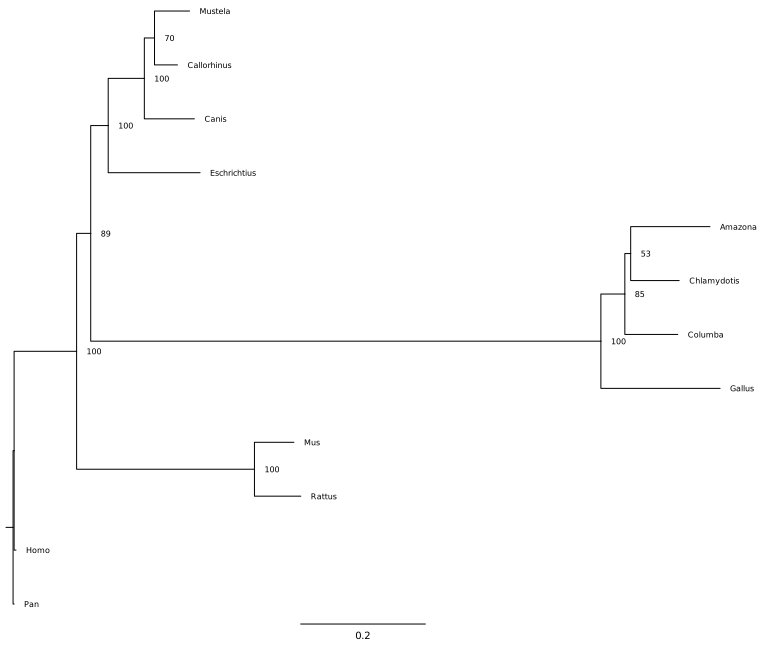

In [2]:
from IPython.core.display import SVG
SVG(filename='data/RAxML_bipartitions.vert.tree.svg')

The main clades of both trees are the same and have solid bootstraps, they also seem reasonable.
Primates (human and chimpanzee), rodents (rat and mouse), birds (amazon, rock dove, MacQueen's bustard, and chicken) and mammals (ferret, northern fur seal, dog, and gray whale) are grouped together.

There is only one pair of species with low bootstrap value in RAxML tree - amazon and rock dove, because this they are closely related species.